# 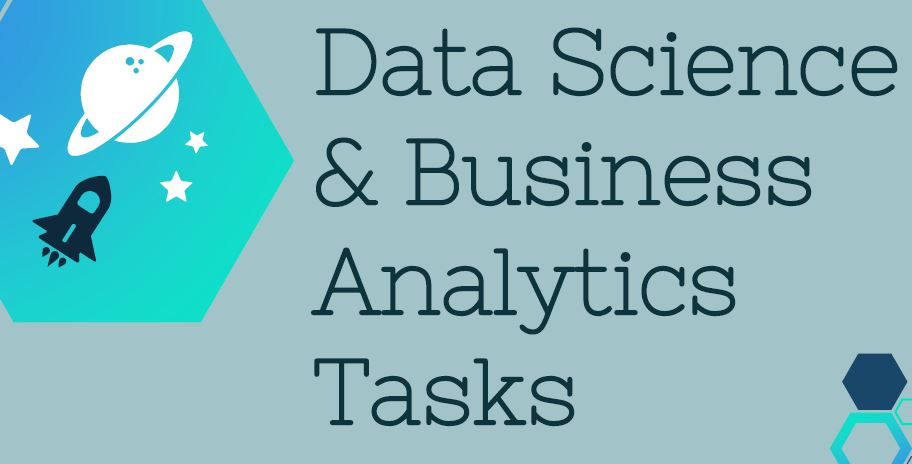 
Author: Nimesh Pokharel      
Submitted to: The Spark Foundation
Task 2 

# IRIS DATSETS-Unsupervised Machine Learning: k-Means Clustering

# Dataset Download and Data Assessment

In [350]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from copy import deepcopy

%matplotlib inline



This dataset consists of 3 different types of irises’ (classes),  namely Setosa, Versicolour, and Virginica) as well as their respective petal and sepal length (features). In total, the dataset consists of **150 samples** (50 samples per class) as well as their corresponding **4 different measurements** taken for each sample. 


In [351]:
iris = pd.read_csv("Iris.csv") #load the dataset
iris.drop('Id',axis=1,inplace=True) 

iris.columns = ['sepal_length','sepal_width','petal_length','petal_width','Species']


In [352]:
iris.head() 

,sepal_length,sepal_width,petal_length,petal_width,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [353]:
iris.shape

(150, 5)

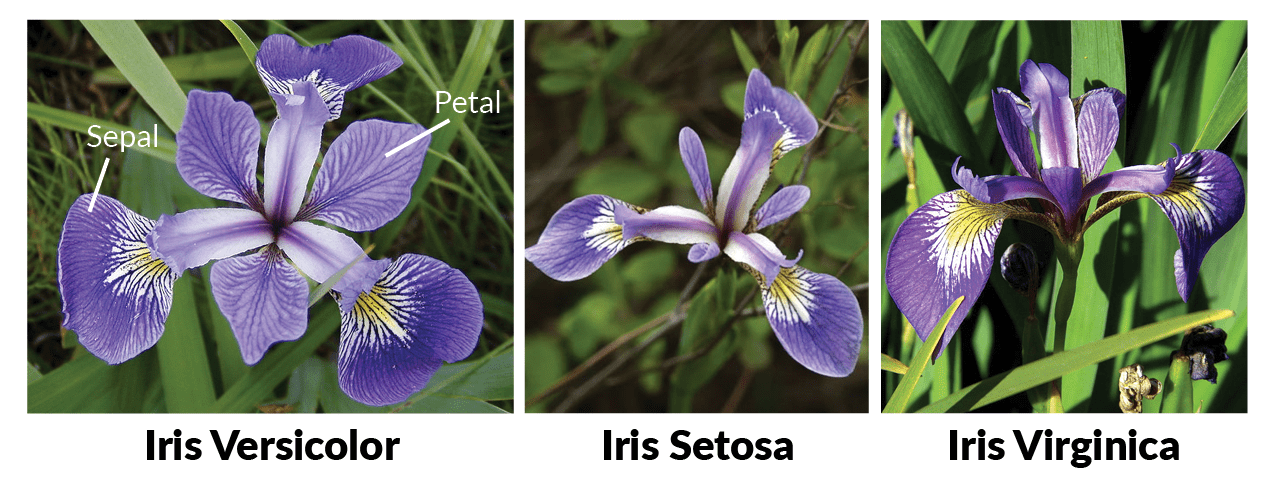# 

In [354]:
iris["Species"] = pd.Categorical(iris["Species"])
iris["Species"] = iris["Species"].cat.codes
# Change dataframe to numpy matrix
data = iris.values[:, 0:4]
category = iris.values[:, 4] 

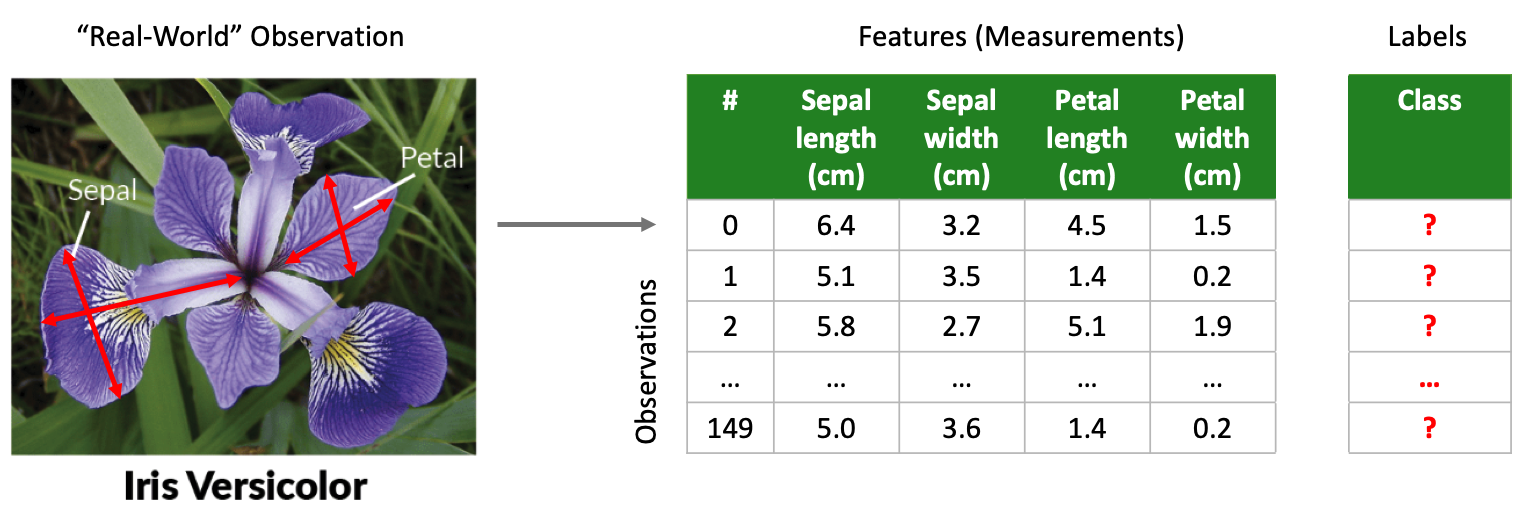# 

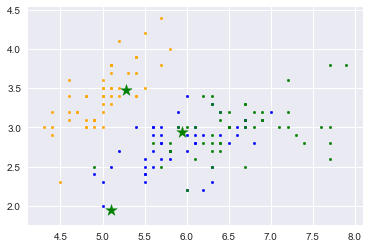

In [355]:
# Number of clusters
k = 3
# Number of training data
n = data.shape[0]
# Number of features in the data
c = data.shape[1]

# Generate random centers, here we use sigma and mean to ensure it represent the whole data
mean = np.mean(data, axis = 0)
std = np.std(data, axis = 0)
centers = np.random.randn(k,c)*std + mean

# Plot the data and the centers generated as random
colors=['orange', 'blue', 'green']
for i in range(n):
    plt.scatter(data[i, 0], data[i,1], s=7, color = colors[int(category[i])])
plt.scatter(centers[:,0], centers[:,1], marker='*', c='g', s=150)

In [356]:
centers_old = np.zeros(centers.shape) # to store old centers
centers_new = deepcopy(centers) # Store new centers

data.shape
clusters = np.zeros(n)
distances = np.zeros((n,k))

error = np.linalg.norm(centers_new - centers_old)

# When, after an update, the estimate of that center stays the same, exit loop
while error != 0:
    # Measure the distance to every center
    for i in range(k):
        distances[:,i] = np.linalg.norm(data - centers[i], axis=1)
    # Assign all training data to closest center
    clusters = np.argmin(distances, axis = 1)
    
    centers_old = deepcopy(centers_new)
    # Calculate mean for every cluster and update the center
    for i in range(k):
        centers_new[i] = np.mean(data[clusters == i], axis=0)
    error = np.linalg.norm(centers_new - centers_old)
centers_new    

array([[7.7       , 2.6       , 6.9       , 2.3       ],
       [6.24747475, 2.87474747, 4.88585859, 1.66969697],
       [5.006     , 3.418     , 1.464     , 0.244     ]])

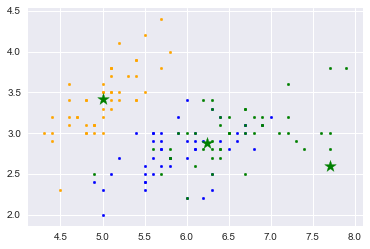

In [357]:
# Plot the data and the centers generated as random
colors=['orange', 'blue', 'green']
for i in range(n):
    plt.scatter(data[i, 0], data[i,1], s=7, color = colors[int(category[i])])
plt.scatter(centers_new[:,0], centers_new[:,1], marker='*', c='g', s=150)

<Figure size 720x720 with 0 Axes>

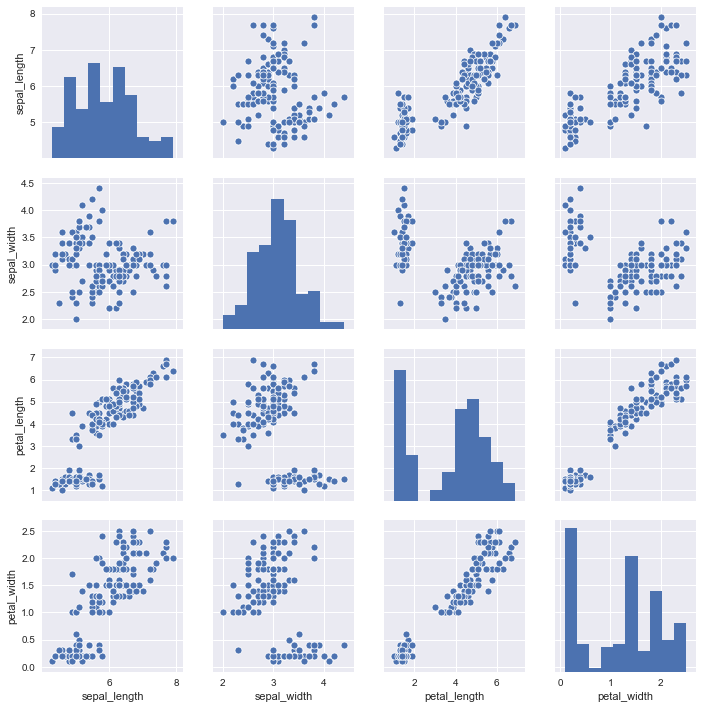

In [358]:
# import matplotlib data visualization library

plt.figure(figsize=(10, 10))
d_plot=sns.load_dataset("iris")

# unsupervised scenario
sns.pairplot(d_plot, diag_kind='hist');

In [359]:
x = iris.iloc[:, [0, 1, 2, 3]].values

from sklearn.cluster import KMeans
wcss = []

In [360]:
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

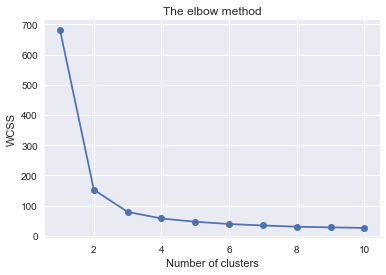

In [361]:
plt.plot(range(1, 11), wcss,'-o')
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') 
plt.show()

In [362]:
Kmean = KMeans(n_clusters=3)
Kmean.fit(x) 
print(Kmean.inertia_)

78.94084142614602


In [363]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

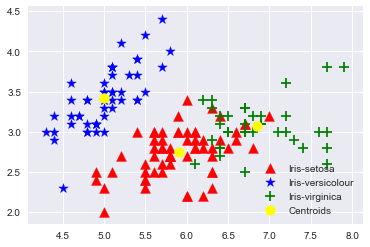

In [364]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'red',marker='^', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'blue', marker='*', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', marker='+', label = 'Iris-virginica')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

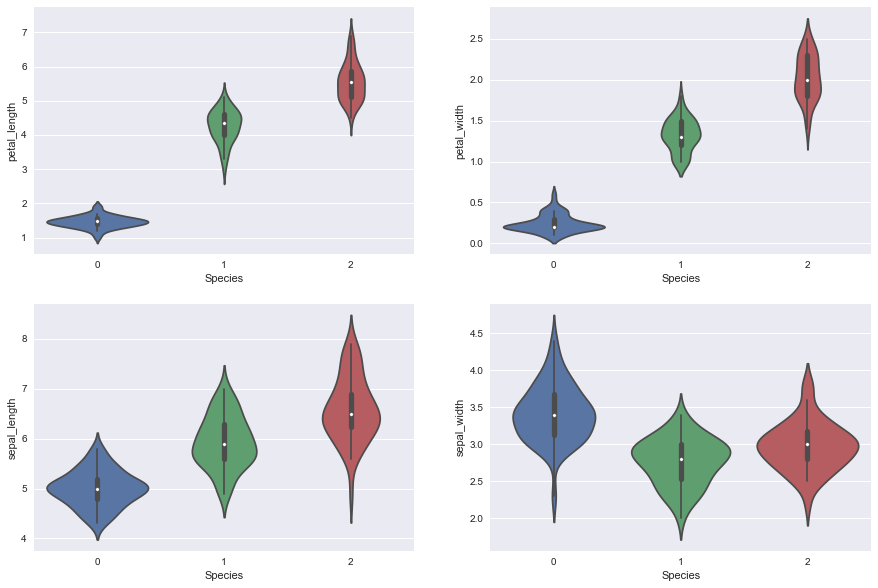

In [365]:
import seaborn as sns
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='Species',y='petal_length',data=iris)
plt.subplot(2,2,2)
sns.violinplot(x='Species',y='petal_width',data=iris)
plt.subplot(2,2,3)
sns.violinplot(x='Species',y='sepal_length',data=iris) 
plt.subplot(2,2,4)
sns.violinplot(x='Species',y='sepal_width',data=iris) 